<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.509015,66.869544,55.164588,-0.000747,182.542399,182.543872,-0.001473
1,0.0,1.0,36.866239,39.850374,22.310089,-0.001941,109.024760,109.028236,-0.003476
2,0.0,2.0,72.684195,41.403978,51.216071,0.003286,175.307530,175.305176,0.002354
3,0.0,3.0,56.433893,46.335735,28.116635,0.011093,140.897356,140.887428,0.009928
4,0.0,4.0,36.408130,64.546477,21.704459,0.002865,132.661930,132.660183,0.001747
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.893724,78.178997,55.447499,-0.003205,234.517015,234.519659,-0.002645
249996,999.0,246.0,29.278118,65.719327,57.635642,-0.002665,162.630422,162.633919,-0.003497
249997,999.0,247.0,36.109917,50.769099,87.397088,0.009677,184.285782,184.276967,0.008815
249998,999.0,248.0,34.609903,55.055414,74.926277,-0.000108,174.591486,174.592393,-0.000907


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.509015  66.869544  55.164588 -0.000747  182.542399   
      1.0    36.866239  39.850374  22.310089 -0.001941  109.024760   
      2.0    72.684195  41.403978  51.216071  0.003286  175.307530   
      3.0    56.433893  46.335735  28.116635  0.011093  140.897356   
      4.0    36.408130  64.546477  21.704459  0.002865  132.661930   
...                ...        ...        ...       ...         ...   
999.0 245.0  90.893724  78.178997  55.447499 -0.003205  234.517015   
      246.0  29.278118  65.719327  57.635642 -0.002665  162.630422   
      247.0  36.109917  50.769099  87.397088  0.009677  184.285782   
      248.0  34.609903  55.055414  74.926277 -0.000108  174.591486   
      249.0  51.034598  69.297150  54.727890 -0.005210  185.054429   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    182.543872 -0.001473  
      1.0    109.028236 -0.003476  
      2.0    175.305176  0.002354  
      3.0    140.887428  0.009928  
      4.0    132.660183  0.001747  
...                 ...       ...  
999.0 245.0  234.519659 -0.002645  
      246.0  162.633919 -0.003497  
      247.0  184.276967  0.008815  
      248.0  174.592393 -0.000907  
      249.0  185.059947 -0.005519  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.509015  66.869544  55.164588 -0.000747  182.542399   
      1.0    36.866239  39.850374  22.310089 -0.001941  109.024760   
      2.0    72.684195  41.403978  51.216071  0.003286  175.307530   
      3.0    56.433893  46.335735  28.116635  0.011093  140.897356   
      4.0    36.408130  64.546477  21.704459  0.002865  132.661930   
...                ...        ...        ...       ...         ...   
999.0 245.0  90.893724  78.178997  55.447499 -0.003205  234.517015   
      246.0  29.278118  65.719327  57.635642 -0.002665  162.630422   
      247.0  36.109917  50.769099  87.397088  0.009677  184.285782   
      248.0  34.609903  55.055414  74.926277 -0.000108  174.591486   
      249.0  51.034598  69.297150  54.727890 -0.005210  185.054429   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    182.543872 -0.001473  
      1.0    109.028236 -0.003476  
      2.0    175.305176  0.002354  
      3.0    140.887428  0.009928  
      4.0    132.660183  0.001747  
...                 ...       ...  
999.0 245.0  234.519659 -0.002645  
      246.0  162.633919 -0.003497  
      247.0  184.276967  0.008815  
      248.0  174.592393 -0.000907  
      249.0  185.059947 -0.005519  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.509015,66.869544,55.164588,-0.000747,182.542399,182.543872,-0.001473
1,0.0,1.0,36.866239,39.850374,22.310089,-0.001941,109.024760,109.028236,-0.003476
2,0.0,2.0,72.684195,41.403978,51.216071,0.003286,175.307530,175.305176,0.002354
3,0.0,3.0,56.433893,46.335735,28.116635,0.011093,140.897356,140.887428,0.009928
4,0.0,4.0,36.408130,64.546477,21.704459,0.002865,132.661930,132.660183,0.001747
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.893724,78.178997,55.447499,-0.003205,234.517015,234.519659,-0.002645
249996,999.0,246.0,29.278118,65.719327,57.635642,-0.002665,162.630422,162.633919,-0.003497
249997,999.0,247.0,36.109917,50.769099,87.397088,0.009677,184.285782,184.276967,0.008815
249998,999.0,248.0,34.609903,55.055414,74.926277,-0.000108,174.591486,174.592393,-0.000907


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.509015  66.869544  55.164588 -0.000747  182.542399   
      1.0    36.866239  39.850374  22.310089 -0.001941  109.024760   
      2.0    72.684195  41.403978  51.216071  0.003286  175.307530   
      3.0    56.433893  46.335735  28.116635  0.011093  140.897356   
      4.0    36.408130  64.546477  21.704459  0.002865  132.661930   
...                ...        ...        ...       ...         ...   
999.0 245.0  90.893724  78.178997  55.447499 -0.003205  234.517015   
      246.0  29.278118  65.719327  57.635642 -0.002665  162.630422   
      247.0  36.109917  50.769099  87.397088  0.009677  184.285782   
      248.0  34.609903  55.055414  74.926277 -0.000108  174.591486   
      249.0  51.034598  69.297150  54.727890 -0.005210  185.054429   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    182.543872 -0.001473  
      1.0    109.028236 -0.003476  
      2.0    175.305176  0.002354  
      3.0    140.887428  0.009928  
      4.0    132.660183  0.001747  
...                 ...       ...  
999.0 245.0  234.519659 -0.002645  
      246.0  162.633919 -0.003497  
      247.0  184.276967  0.008815  
      248.0  174.592393 -0.000907  
      249.0  185.059947 -0.005519  

[250000 rows x 7 columns]

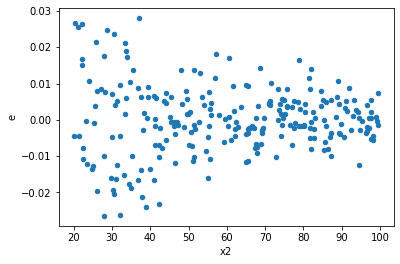

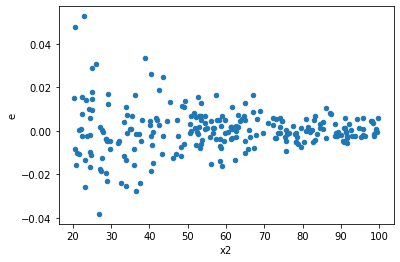

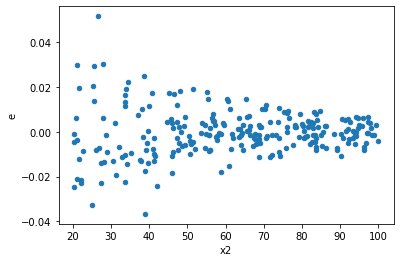

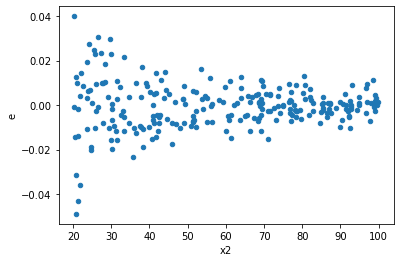

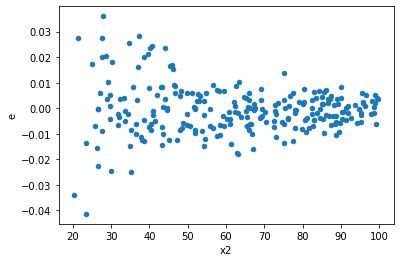

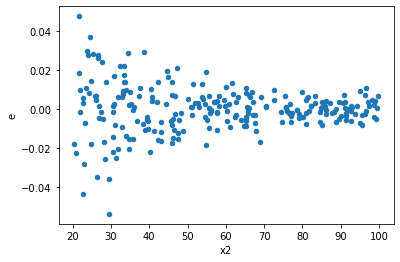

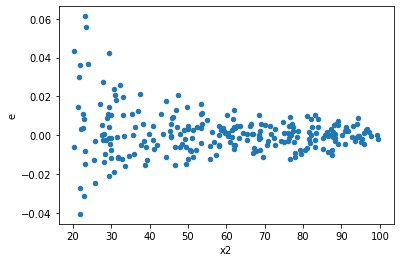

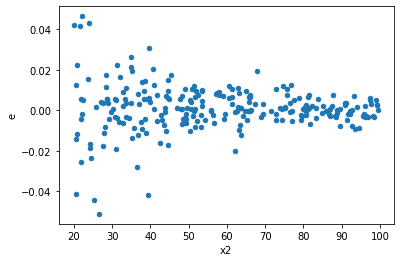

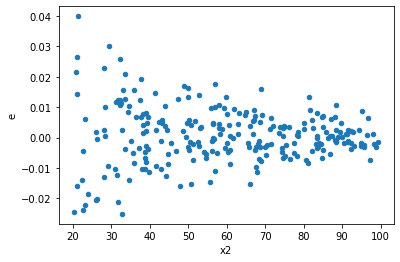

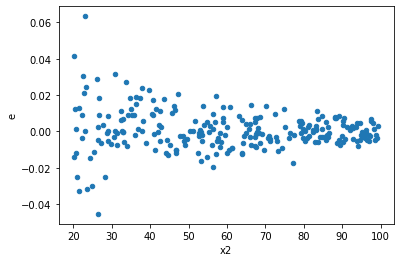

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,135.0,109.0,0.010593039461221804,0.020130998447982218,7.846695897201336e-05,0.00018468805915580018,2.3537048150632733,5.36650215043899e-06,0.9999973167489248,2.683251075219495e-06,Reject005=0 : Heteroscedasticity
4.0,112.0,132.0,0.006562119598513482,0.021058783212969043,5.8590353558156086e-05,0.0001595362364618867,2.722909604966506,4.5064996845312066e-08,0.9999999774675016,2.2532498422656033e-08,Reject005=0 : Heteroscedasticity
7.0,127.0,117.0,0.008089001377746671,0.029075520086730044,6.369292423422576e-05,0.00024850871869000035,3.901669167773314,7.380762667708041e-13,0.999999999999631,3.6903813338540203e-13,Reject005=0 : Heteroscedasticity
8.0,122.0,122.0,0.007526272715206606,0.014696330220585935,6.169075996070988e-05,0.00012046172311955685,1.9526704355121822,0.00025748229135991174,0.99987125885432,0.00012874114567995587,Reject005=0 : Heteroscedasticity
9.0,115.0,129.0,0.006651805400855412,0.022711247149313822,5.7841786094394884e-05,0.00017605617945204514,3.0437542015858625,1.5332115577137984e-09,0.9999999992333942,7.666057788568992e-10,Reject005=0 : Heteroscedasticity
10.0,120.0,124.0,0.007840141602198368,0.014199124008804761,6.533451335165306e-05,0.00011450906458713517,1.7526581084458006,0.0020844057206126365,0.9989577971396937,0.0010422028603063183,Reject005=0 : Heteroscedasticity
14.0,130.0,114.0,0.009680072324334411,0.013498363869375507,7.44620948025724e-05,0.00011840670060855708,1.5901607512184381,0.011635248728183445,0.9941823756359083,0.0058176243640917225,Reject005=0 : Heteroscedasticity
16.0,119.0,125.0,0.006898622596065296,0.024645918794092173,5.797161845433022e-05,0.00019716735035273737,3.401101359763915,4.629407968081978e-11,0.999999999976853,2.314703984040989e-11,Reject005=0 : Heteroscedasticity
19.0,126.0,118.0,0.011469249896059042,0.01814943675660362,9.102579282586541e-05,0.00015380878607291205,1.689727507972955,0.004193761142329722,0.9979031194288351,0.002096880571164861,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,116.0,128.0,0.016448818986640072,0.006515691024998257,0.00014180016367793165,5.090383613279888e-05,0.35898291519899733,4.32472179311311e-08,Reject005=0 : Heteroscedasticity
1.0,135.0,109.0,0.010593039461221804,0.020130998447982218,7.846695897201336e-05,0.00018468805915580018,2.3537048150632733,5.36650215043899e-06,Reject005=0 : Heteroscedasticity
2.0,119.0,125.0,0.017289452385654536,0.008938246467573938,0.00014528951584583645,7.15059717405915e-05,0.4921619521154227,0.00011618054319091441,Reject005=0 : Heteroscedasticity
3.0,128.0,116.0,0.023544058519885017,0.006762230955800013,0.0001839379571866017,5.829509444655184e-05,0.3169280301803751,4.930223488144628e-10,Reject005=0 : Heteroscedasticity
4.0,112.0,132.0,0.006562119598513482,0.021058783212969043,5.8590353558156086e-05,0.0001595362364618867,2.722909604966506,4.5064996845312066e-08,Reject005=0 : Heteroscedasticity
5.0,122.0,122.0,0.01867145067555397,0.004924295790673575,0.00015304467766847515,4.036308025142274e-05,0.26373396884050493,1.26101180693043e-12,Reject005=0 : Heteroscedasticity
6.0,106.0,138.0,0.014084628511656573,0.008487951788111932,0.00013287385388355258,6.150689701530385e-05,0.4628969147625311,4.4194536617370864e-05,Reject005=0 : Heteroscedasticity
7.0,127.0,117.0,0.008089001377746671,0.029075520086730044,6.369292423422576e-05,0.00024850871869000035,3.901669167773314,7.380762667708041e-13,Reject005=0 : Heteroscedasticity
8.0,122.0,122.0,0.007526272715206606,0.014696330220585935,6.169075996070988e-05,0.00012046172311955685,1.9526704355121822,0.00025748229135991174,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    974
Reject005=1 : Homoscedasticity       26
Name: Result_test, dtype: int64